In [44]:
import pandas as pd
data = pd.read_csv('C:/Users/hoang/Desktop/Big-Data_Mirea2023/Пр4/Stock Market Dataset.csv')
data


,Open,High,Low,Close,Adj Close,Volume
0,45.099998,50.090000,44.000000,44.900002,44.900002,117701670
1,45.930000,46.939999,40.685001,41.650002,41.650002,27925307
2,40.500000,43.000000,39.400002,42.900002,42.900002,16113941
3,43.660000,43.779999,41.830002,41.900002,41.900002,6316755
4,41.029999,42.869999,40.759998,42.599998,42.599998,8688325
...,...,...,...,...,...,...
2254,50.000000,50.750000,49.549999,49.889999,49.889999,51209029
2255,50.709999,51.860001,50.520000,51.520000,51.520000,22987553
2256,52.415001,53.180000,52.200001,52.779999,52.779999,35077848
2257,52.950001,53.500000,52.770000,53.349998,53.349998,28064973


In [45]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2259 entries, 0 to 2258
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2259 non-null   float64
 1   High       2259 non-null   float64
 2   Low        2259 non-null   float64
 3   Close      2259 non-null   float64
 4   Adj Close  2259 non-null   float64
 5   Volume     2259 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 106.0 KB


In [46]:
data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [65]:
corr_matrix = data.corr().loc['Adj Close'].to_frame().round(2)
corr_matrix.style.background_gradient(cmap='coolwarm')


,Adj Close
Open,1.000000
High,1.000000
Low,1.000000
Close,1.000000
Adj Close,1.000000
Volume,-0.020000


In [67]:
max_corr_column = corr_matrix['Adj Close'].idxmax()
max_corr_value = corr_matrix['Adj Close'].max()

print("Столбец с наибольшей корреляцией с параметром «Adj Close»:", max_corr_column)



Столбец с наибольшей корреляцией с параметром «Adj Close»: Open


In [69]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model

LinearRegression()

In [100]:
import numpy as np
y = data['Adj Close']
y = data['Open']
x = np.array(x, type(float))
y = np.array(y, type(float))

In [101]:

x = x.reshape(-1, 1)
model.fit(x,y)

LinearRegression()

In [102]:
coef = model.coef_
intercept = model.intercept_

In [97]:
coef, intercept

(array([0.99942994]), 0.037184334103578465)

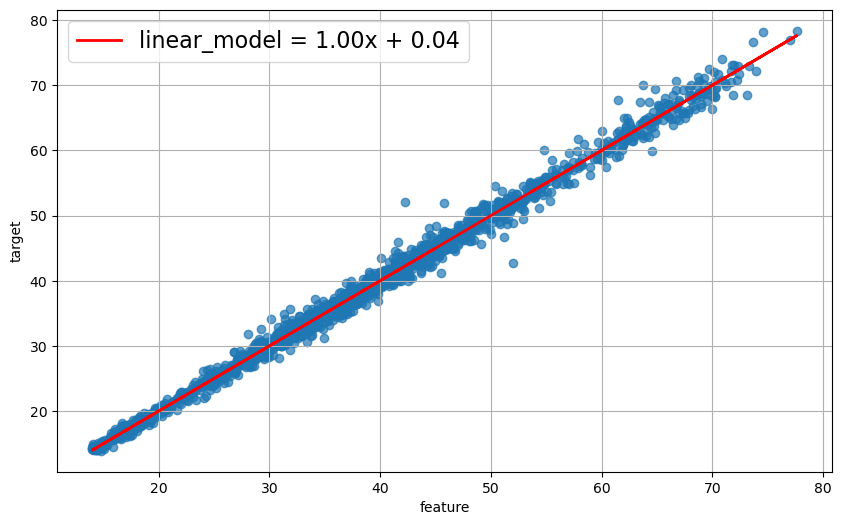

In [109]:
import matplotlib.pyplot as plt
model_a = coef[0]
model_b = intercept

model_y_sk = model_a * X + model_b

fig = plt.figure(figsize=(10, 6))
plt.plot(X, model_y_sk, linewidth=2, color='r', label=f'linear_model = {model_a:.2f}x + {model_b:.2f}')
plt.scatter(x, y, alpha=0.7)

plt.grid()
plt.xlabel('feature')
plt.ylabel('target')
plt.legend(prop={'size': 16})
plt.show()

In [108]:
from sklearn.metrics import mean_squared_error
mean_squared_error(model_y_sk, y)

1.029039659852059